In [1]:
import torch
from torchanalyse  import profiler, System, Unit, dot_roofline, display_df

unit = Unit()
hopper_system = System(
    unit,
    flops=990,
    offchip_mem_bw=4000,
)



In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/gemma-7b")
text = "Replace me by any text you'd like."

encoded_input = tokenizer(text, return_tensors='pt')
tokenizer = AutoTokenizer.from_pretrained("google/gemma-7b")
encoded_input = tokenizer(text, return_tensors='pt')

In [3]:
from transformers import GemmaModel, GemmaConfig
gemmaconfig = GemmaConfig(num_hidden_layers=1)     ## 7B
gemma_model = GemmaModel(gemmaconfig)



In [4]:
import torch
B = 32
N = 1024
random_text = torch.randint(2, 235248, (B, N))
encoded_input = torch.cat((torch.full((random_text.size(0), 1), 2), random_text, torch.full((random_text.size(0), 1), 235248)), dim=1)

In [5]:
encoded_input.shape

torch.Size([32, 1026])

In [6]:


# macs = profile_macs(model, inputs)
# print('transformer: {:.4g} G'.format(macs / 1e9))
op_df = profiler(gemma_model, encoded_input, hopper_system, unit)


/Users/abambhaniya3/Work/DL_codes/torchanalyse/torchanalyse/profile.py:35: UserWarning: No handlers found: "aten::scalarimplicit". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(node.operator))
/Users/abambhaniya3/Work/DL_codes/torchanalyse/torchanalyse/profile.py:35: UserWarning: No handlers found: "aten::arange". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(node.operator))
/Users/abambhaniya3/Work/DL_codes/torchanalyse/torchanalyse/profile.py:35: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(node.operator))
/Users/abambhaniya3/Work/DL_codes/torchanalyse/torchanalyse/profile.py:35: UserWarning: No handlers found: "aten::repeat". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(node.operator))
/Users/abambhaniya3/Work/DL_codes/torchanalyse/torchanalyse/profile.py:35: UserWarning: No handlers found: "aten::pow". Skipped.
  warnings.warn('No handlers fou

/Users/abambhaniya3/Work/DL_codes/torchanalyse/torchanalyse/plots.py:69: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_bound_type, subset=['Bound'])\


,Op Type,"Dimension(input, weight,output)",Op Intensity,Flops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Bound,Compute Cycles,Memory Cycles,C/M ratio,Cycles,% of total time,Throughput (Tflops),Latency (msec),C Effcy,Roofline Throughput offchip (Tflops),Roofline Throughput onchip (Tflops),Sparsity,Total energy (mJ)
0,aten::mul,"([32, 1, 8192, 8192], 1, [32, 1, 8192, 8192])",0.500000,4294.967296,2147.483648,0.000001,2147.483648,4294.967297,M,4078.049756,2018634.629590,0.002020,2018634.629590,9.455826,2.000000,2.147484,1.000000,2.000000,9.000000,0.000000,0.000000
1,aten::mul,"([32, 1026, 3072], 1, [32, 1026, 3072])",0.500000,201.719808,100.859904,0.000001,100.859904,201.719809,M,191.531939,94808.310230,0.002020,94808.310230,0.444108,2.000000,0.100860,1.000000,2.000000,9.000000,0.000000,0.000000
2,aten::mean,"([32, 1026, 3072], [32, 1026, 1])",0.000325,0.065664,100.859904,0.000000,0.032832,100.892736,M,0.062348,47419.585920,0.000001,47419.585920,0.222126,0.001302,0.050446,1.000000,0.001302,0.005857,0.000000,0.000000
3,aten::mul,"([32, 1026, 3072], 1, [32, 1026, 3072])",0.500000,201.719808,100.859904,0.000001,100.859904,201.719809,M,191.531939,94808.310230,0.002020,94808.310230,0.444108,2.000000,0.100860,1.000000,2.000000,9.000000,0.000000,0.000000
4,aten::mul,"([32, 1026, 3072], 1, [32, 1026, 3072])",0.500000,201.719808,100.859904,0.000001,100.859904,201.719809,M,191.531939,94808.310230,0.002020,94808.310230,0.444108,2.000000,0.100860,1.000000,2.000000,9.000000,0.000000,0.000000
5,aten::linear,"([32, 1026, 3072], [4096, 3072], [32, 1026, 4096])",1666.334655,826244.333568,100.859904,12.582912,134.479872,247.922688,C,784514.821772,116523.663360,6.732665,784514.821772,3.674878,990.000000,0.834590,1.000000,990.000000,990.000000,0.000000,265082537.434213
6,aten::linear,"([32, 1026, 3072], [4096, 3072], [32, 1026, 4096])",1666.334655,826244.333568,100.859904,12.582912,134.479872,247.922688,C,784514.821772,116523.663360,6.732665,784514.821772,3.674878,990.000000,0.834590,1.000000,990.000000,990.000000,0.000000,265082537.434213
7,aten::linear,"([32, 1026, 3072], [4096, 3072], [32, 1026, 4096])",1666.334655,826244.333568,100.859904,12.582912,134.479872,247.922688,C,784514.821772,116523.663360,6.732665,784514.821772,3.674878,990.000000,0.834590,1.000000,990.000000,990.000000,0.000000,265082537.434213
8,aten::mul,"([128], 1, [128])",0.498054,0.000256,0.000128,0.000001,0.000128,0.000257,M,0.000243,0.120790,0.002012,0.120790,0.000001,1.992218,0.000000,1.000000,1.992218,8.964981,0.000000,0.000000
9,aten::matmul,"([1, 128, 1], [1, 1, 1026], [1, 128, 1026])",0.991289,0.262656,0.000128,0.001026,0.131328,0.132482,M,0.249391,62.266540,0.004005,62.266540,0.000292,3.965158,0.000066,1.000000,3.965158,17.843209,0.000000,2237400.089033


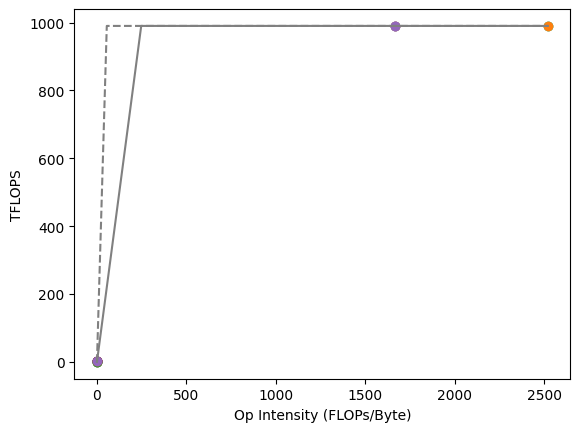

In [10]:
display_df(op_df)
dot_roofline(op_df, hopper_system, unit)


In [9]:
op_df.to_csv("gemma7B_on_hopper.csv")